## Desafio 1 Proposta de Análise Demográfica SIDRA - IBGE 2010

De acordo com o excercício proposto estruturou-se o Dataset com os tópicos solicitados, realizei a divisão em 3 partes:

- Parte I: Leitura e Proposição de análises para o banco de dados do IBGE

- Parte II: Elaboração de Análise como visão de negócios, tipos de aplicações práticas e eventuais problemas.






# PARTE I

## Lendo e propondo análises para o banco de dados do IBGE

In [1]:
# importando as bibliotecas 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'../../99 Datasets/demografia_1.csv')

In [3]:
# imprimindo as cinco primeiras linhas do dataframe
df.head(10)

,seq,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte
5,5,1.100190e+10,30,mulher,15.0,Amarela,88550.000000,0.0,nordeste
6,6,1.100190e+10,52,mulher,5.0,Branca,6734.400391,0.0,norte
7,7,1.100190e+10,29,homem,5.0,Parda,14875.200684,0.0,norte
8,8,1.100190e+10,29,mulher,11.0,Parda,6734.400391,0.0,norte
9,9,1.100191e+10,46,mulher,15.0,Branca,54300.000000,1.0,norte


In [4]:
# shape 
df.shape

(66470, 9)

In [5]:
# resumo dos dados
df.describe()

,seq,id,idade,anos_estudo,salario,estado_civil
count,66470.000000,6.647000e+04,66470.000000,66036.000000,47878.000000,66470.000000
mean,33234.500000,3.445307e+10,37.634813,8.686065,19706.790323,0.587724
std,19188.380534,1.292491e+10,11.380158,3.374522,88627.532024,0.492248
min,0.000000,1.100190e+10,20.000000,5.000000,-1.000000,0.000000
25%,16617.250000,3.110060e+10,28.000000,5.000000,3780.000000,0.000000
50%,33234.500000,3.316781e+10,37.000000,8.000000,7113.599609,1.000000
75%,49851.750000,4.310361e+10,47.000000,11.000000,12720.000000,1.000000
max,66469.000000,5.311702e+10,60.000000,15.000000,999999.000000,1.000000


In [6]:
# variância é o desvio padrão ao quadrado
# desvio padrão é a raiz quadrada da variância
std = df.std()
var = df.std()**2
print('Desvio padrão: ', std)
print('Variância: ', var)

Desvio padrão:  seq             1.918838e+04
id              1.292491e+10
idade           1.138016e+01
anos_estudo     3.374522e+00
salario         8.862753e+04
estado_civil    4.922481e-01
dtype: float64
Variância:  seq             3.681939e+08
id              1.670532e+20
idade           1.295080e+02
anos_estudo     1.138740e+01
salario         7.854839e+09
estado_civil    2.423082e-01
dtype: float64


Um baixo desvio padrão indica que os pontos dos dados tendem a estar próximos da média ou do valor esperado. Um alto desvio padrão indica que os pontos dos dados estão espalhados por uma ampla gama de valores.

## 2 - Análise básica dos conteúdos de cada coluna com contagem de valores

In [7]:
import csv

with open(r'../../99 Datasets/demografia.csv', 'r') as data_csv:
    data = csv.reader(data_csv)
    
    contador = 0
    for row in data:
        print(row)
        contador = contador + 1
        
#         print(row[2],row[4],row[6])
        if contador == 10:
            break

['seq', 'id', 'idade', 'sexo', 'anos_estudo', 'cor/raca', 'salario', 'estado_civil', 'regiao']
['0', '11001901101.0', '53', 'homem', '5.0', 'Parda', '63600.0', '1.0', 'norte']
['1', '11001901102.0', '49', 'mulher', '8.0', 'Amarela', '', '1.0', 'norte']
['2', '11001901103.0', '22', 'mulher', '11.0', 'Indigena', '4352.400390625', '0.0', 'nordeste']
['3', '11001903101.0', '55', 'homem', '15.0', 'Amarela', '96600.0', '1.0', 'norte']
['4', '11001903102.0', '56', 'mulher', '15.0', 'Amarela', '157800.0', '1.0', 'norte']
['5', '11001903103.0', '30', 'mulher', '15.0', 'Amarela', '88550.0', '0.0', 'nordeste']
['6', '11001904101.0', '52', 'mulher', '5.0', 'Branca', '6734.400390625', '0.0', 'norte']
['7', '11001904104.0', '29', 'homem', '5.0', 'Parda', '14875.20068359375', '0.0', 'norte']
['8', '11001904105.0', '29', 'mulher', '11.0', 'Parda', '6734.400390625', '0.0', 'norte']


In [8]:
# Separação da leitura do arquivo com dois TRYs diferentes para diferenciação em caso de erro

%time

lista_com_salarios = []
lista_com_idades = list()

with open(r'../../99 Datasets/demografia.csv', 'r') as data_csv:
    data = csv.reader(data_csv)

    for i, line in enumerate(data):
        if i>0:
            try:
                lista_com_idades.append(float(line[2]))
            except:
                pass
            
            try:
                lista_com_salarios.append(float(line[6]))
            except:
                pass

Wall time: 0 ns


In [9]:
len(lista_com_idades)

66470

In [10]:
len(lista_com_salarios)

47878

In [11]:
(len(lista_com_idades) - len(lista_com_salarios))/len(lista_com_idades)

0.279705130133895

## Construção da função que calcula a variância e desvio padrão

In [12]:
def calcula_variancia_e_desvio(lista_valores):
    '''
    Escrever o código para calcular a variância
    '''
    m = sum(lista_valores) / len(lista_valores)
    variancia = sum((xi - m) ** 2 for xi in lista_valores) / len(lista_valores)
    desvio_padrao = variancia**0.5
    
    return variancia, desvio_padrao

In [13]:
def alternativa(lista):
     
    m = sum(lista) / len(lista)
    variancia = sum((xi-m)**2 for xi in lista)/ len(lista)
    desvio_padrao = variancia**0.5
    
    return variancia, desvio_padrao

### Aplicação da função para lista com salários

In [14]:
calcula_variancia_e_desvio(lista_com_salarios)

(7854675373.202344, 88626.60646330957)

In [15]:
calcula_salarios = calcula_variancia_e_desvio(lista_com_salarios)

In [16]:
calcula_salarios

(7854675373.202344, 88626.60646330957)

### Aplicação da função para a lista com idades utilizando uma variável para os resultados

In [17]:
variavel_output = calcula_variancia_e_desvio(lista_com_idades)

In [18]:
variavel_output

(129.5060545120295, 11.380072693617976)

In [19]:
variavel_output[0]

129.5060545120295

In [20]:
variavel_output[1]

11.380072693617976

In [21]:
print('O desvio padrão da idade é:',variavel_output[1])

O desvio padrão da idade é: 11.380072693617976


### Código otimizado apresentando função alternativa

In [22]:
def alternativa(lista):
    
    m = sum(lista) / len(lista)
    variancia = sum((xi - m) ** 2 for xi in lista) / len(lista)
    desvio_padrao = variancia**0.5
    
    return variancia, desvio_padrao

In [23]:
alternativa(lista_com_salarios)

(7854675373.202344, 88626.60646330957)

In [24]:
alternativa(lista_com_idades)

(129.5060545120295, 11.380072693617976)

### Plotando o histograma com matplotlib

In [25]:
import matplotlib.pyplot as plt

## Histograma dos salários

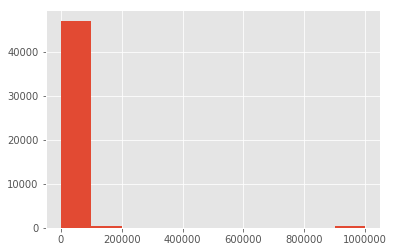

In [26]:
plt.hist(lista_com_salarios)
plt.show()

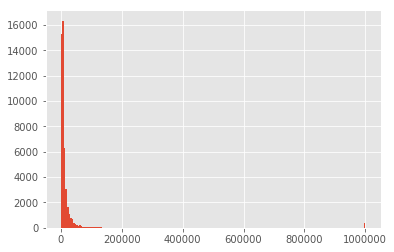

In [27]:
# Alterando a quantidade de bins
plt.hist(lista_com_salarios, bins=200)
plt.show()

#### Escolhendo o range de valores

O range é o parâmetro que define o intervalo do gistograma e também precisa de parametrização para melhor visualização da variação.

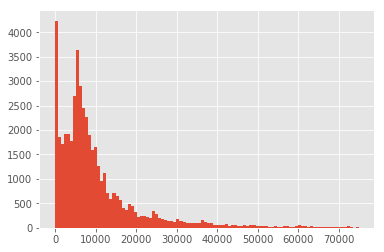

In [28]:
plt.hist(lista_com_salarios, bins=100, range=(-100, 75000))
plt.show()

## Histograma da lista com idades

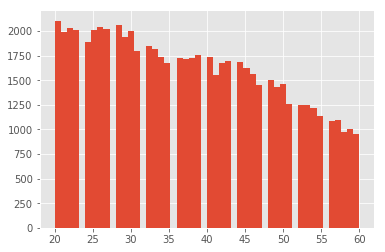

In [29]:
plt.hist(lista_com_idades, bins=50)
plt.show()

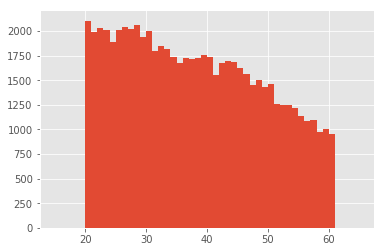

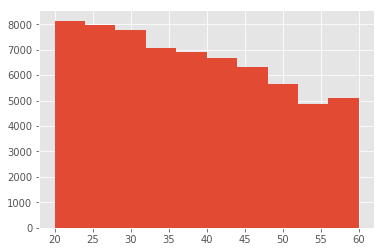

In [30]:

plt.hist(lista_com_idades, bins=50, range=(15,65))
plt.show()


plt.hist(lista_com_idades)
plt.show()


### Análise para a variável anos de estudo

In [31]:
import csv 
lista_anos_estudo = []

with open(r'../../99 Datasets/demografia.csv', 'r') as data_csv:
    data = csv.reader(data_csv)

    for i, line in enumerate(data):
        if i>0:
            try:
                lista_anos_estudo.append(float(line[4]))
            except:
                pass

In [32]:
calcula_variancia_e_desvio(lista_anos_estudo)

(11.38722541001689, 3.3744963194552295)

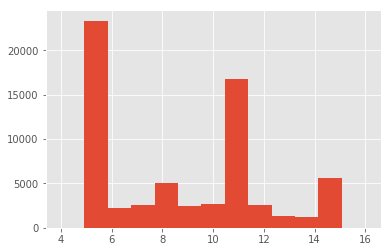

In [33]:
plt.hist(lista_anos_estudo, bins = 13, range=(4,16))
plt.show()

### Analisando a correlação dos dados

In [34]:
print(len(lista_com_idades), len(lista_com_salarios))
print('\n')
print(lista_com_idades[:5])
print(lista_com_salarios[:5])

66470 47878


[53.0, 49.0, 22.0, 55.0, 56.0]
[63600.0, 4352.400390625, 96600.0, 157800.0, 88550.0]


### Lendo e definindo uma lista de valores com idades e anos de estudo


In [35]:
def corr_metodo_raiz(data):
    n = len(data)
    sumx = sum(i[0] for i in data)
    sumy = sum(i[1] for i in data)
    
    sumxSq=sum([i[0]**2.0 for i in data])
    sumySq=sum([i[1]**2.0 for i in data])
    
    pSum=sum([i[0]*i[1] for i in data])
    
    numerador=pSum-(sumx*sumy/n)
    denominador=((sumxSq-pow(sumx,2)/n)*(sumySq-pow(sumy,2)/n))**.5
    
    if denominador==0:
        r=0
    else:
        r=numerador/denominador
        
    return r

In [36]:
idade_estudo = []

with open(r'../../99 Datasets/demografia.csv', 'r') as data_csv:
    data = csv.reader(data_csv)
    for i, line in enumerate(data):
        observação = [] # cria uma lista em branco a cada iteração
        if i>0:
            try: # para evitar os campos nulos
                observação.append(float(line[2]))
                observação.append(float(line[4]))
                idade_estudo.append(observação)
            except:
                pass
            
len(idade_estudo)

66036

In [37]:
idade_estudo[:10]

[[53.0, 5.0],
 [49.0, 8.0],
 [22.0, 11.0],
 [55.0, 15.0],
 [56.0, 15.0],
 [30.0, 15.0],
 [52.0, 5.0],
 [29.0, 5.0],
 [29.0, 11.0],
 [46.0, 15.0]]

In [38]:
corr_metodo_raiz(idade_estudo)

-0.22316633803425154

In [39]:
lista_com_idades = []
lista_com_estudo = []

for row in idade_estudo:
    lista_com_idades.append(row[0])
    lista_com_estudo.append(row[1])  

In [40]:
len(lista_com_idades),len(lista_com_estudo)

(66036, 66036)

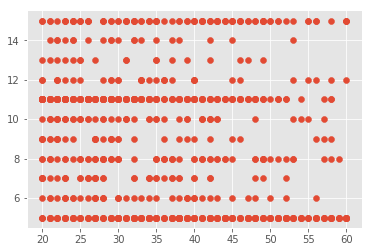

In [41]:
plt.scatter(x=lista_com_idades[:1000], y=lista_com_estudo[:1000])

## Covariância

In [42]:
from numpy import cov

cov(lista_com_idades, lista_com_estudo)

array([[129.62205474,  -8.57393891],
       [ -8.57393891,  11.38739785]])

In [43]:
def cov_func(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a)-1)

In [44]:
cov_func(lista_com_idades, lista_com_estudo)

-8.573938913702294

In [45]:
import statistics
std_idades = statistics.stdev(lista_com_idades)
std_estudos = statistics.stdev(lista_com_estudo)

In [46]:
cov_func(lista_com_idades, lista_com_estudo)/(std_idades*std_estudos)

-0.22316633803425104

## Momento - Análise Avançada

## Calculando a correlação de Spearman por Scipy.Stats

In [47]:
from scipy.stats import spearmanr
spearman = spearmanr(lista_com_idades, lista_com_estudo)
spearman[0]

-0.2420298536078769

## Calculando a correlação de Kendall por Scipy.Stats

In [48]:
from scipy.stats import kendalltau
tau = kendalltau(lista_com_idades, lista_com_estudo)
tau[0]

-0.17900231376164755

# PARTE II

Trabalhar a parte analítica com uma visão de negócios, mencionando quais tipos de aplicações práticas este tipo de trabalho se relaciona, e/ou que tipo de problemas este estudo tem a capacidade de cumprir.



Estudo inicial para alcance de consumidores em determinadas regiões e possível target para consumo de produtos de acordo com o tipo de pele com maior incidência x região para as vendas da Beauty Science Brazil.

O objetivo é verificar possíveis oportunidades de investimento em marketing e segmentar inicialmente os esforços em cada região geográfica, analisando o perfil demográfico.

Nosso centro de distribuição de produtos precisa estar alinhado com as estratégias de fornecimento x esforço de marketing por região, após a concentração de pedidos em uma série temporal devemos reavaliar onde poderemos aumentar e/ou diminuir os esforços de mídia digital.

## Análise do Perfil Populacional

In [49]:
df = pd.read_csv(r'../../99 Datasets/demografia.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
seq             66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         47878 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


In [51]:
# verificamos aqui que a correlação anos de estudo e salário não deve ser considerada em virtude da qualidade dos dados
df.describe()

,seq,id,idade,anos_estudo,salario,estado_civil
count,66470.000000,6.647000e+04,66470.000000,66036.000000,47878.000000,66470.000000
mean,33234.500000,3.445307e+10,37.634813,8.686065,19706.790323,0.587724
std,19188.380534,1.292491e+10,11.380158,3.374522,88627.532024,0.492248
min,0.000000,1.100190e+10,20.000000,5.000000,-1.000000,0.000000
25%,16617.250000,3.110060e+10,28.000000,5.000000,3780.000000,0.000000
50%,33234.500000,3.316781e+10,37.000000,8.000000,7113.599609,1.000000
75%,49851.750000,4.310361e+10,47.000000,11.000000,12720.000000,1.000000
max,66469.000000,5.311702e+10,60.000000,15.000000,999999.000000,1.000000


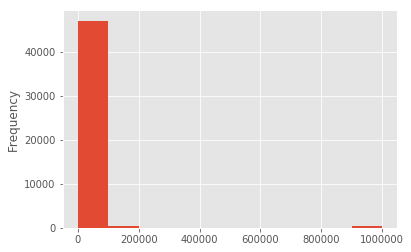

In [52]:
%matplotlib inline 

df.salario.plot.hist(bins=10)

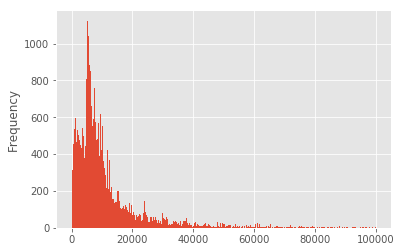

In [53]:
# zoom do histograma anterior
df.salario.plot.hist(bins=500,range=(0.1, 100000))

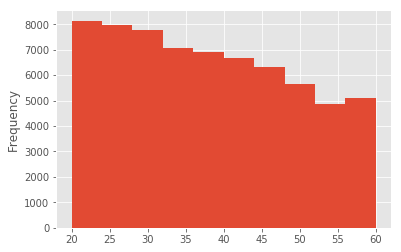

In [54]:
df.idade.plot.hist()

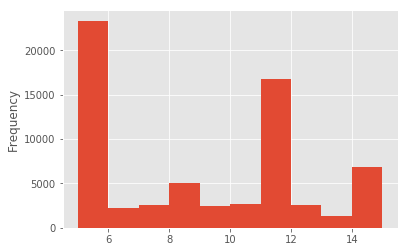

In [55]:
df.anos_estudo.plot.hist()

In [56]:
df.anos_estudo.value_counts()

5.0     23349
11.0    16790
15.0     5636
8.0      5017
10.0     2704
7.0      2612
12.0     2610
9.0      2474
6.0      2237
13.0     1348
14.0     1259
Name: anos_estudo, dtype: int64

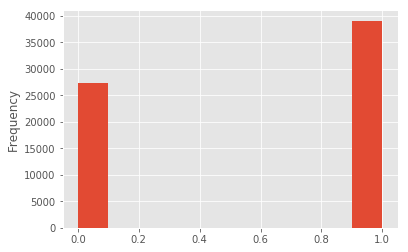

In [57]:
df.estado_civil.plot.hist()

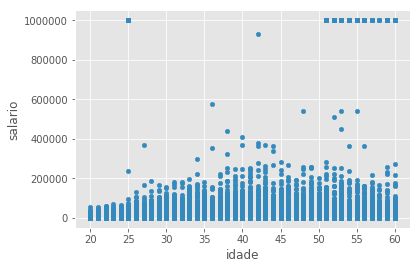

In [58]:
df.plot.scatter(x='idade',y='salario')

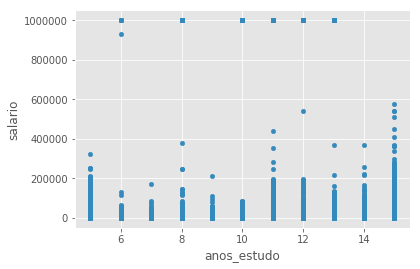

In [59]:
df.plot.scatter(x='anos_estudo',y='salario')

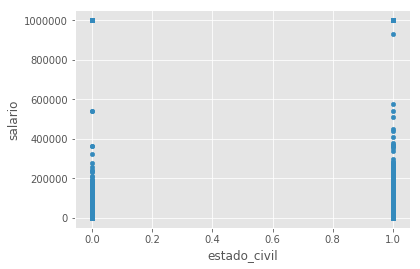

In [60]:
df.plot.scatter(x='estado_civil',y='salario')

## 4 - Tratamento dos dados

In [61]:
df.head()

,seq,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


In [62]:
df.tail()

,seq,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
66465,66465,5.311702e+10,34,mulher,5.0,Branca,NaN,1.0,centro-oeste
66466,66466,5.311702e+10,40,homem,5.0,Parda,2425.000000,1.0,centro-oeste
66467,66467,5.311702e+10,36,mulher,5.0,Parda,2425.000000,1.0,centro-oeste
66468,66468,5.311702e+10,27,mulher,5.0,Branca,5524.200195,1.0,centro-oeste
66469,66469,5.311702e+10,37,homem,5.0,Preta,460.350006,1.0,centro-oeste


## Explorando a variável salário

Em nossa análise vamos identificar o salário médio da população em geral pois será importante uma visão inicial do poder aquisitivo sobretudo para o público feminino.

In [63]:
df['salario'].value_counts(dropna=False).nlargest(7)## Explorando a variável 'salario'


 NaN         18592
 0.0          1841
-1.0          1101
 999999.0      367
 5229.0        277
 7200.0        260
 7560.0        244
Name: salario, dtype: int64

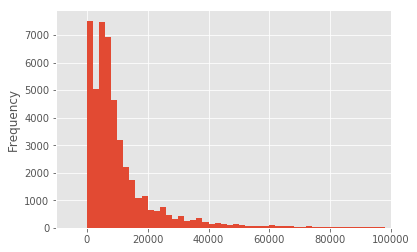

In [64]:
df['salario'].plot.hist(bins=500, xlim=(-10000, 100000))

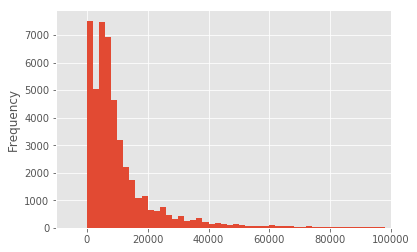

In [65]:
df['salario'].plot.hist(bins=500, xlim=(-10000, 100000))

In [66]:
# total de nulos na variável salário
df['salario'].isnull().sum()

18592

In [67]:
len(df['salario'])

66470

In [68]:
# Porcentagem de valores nulos para a variável salário

round(df['salario'].isnull().sum() / len(df['salario']) * 100, 3)

27.971

Podemos perceber que a quantidade de valores nulos é grande (18592 em 66470 -> 28%). Como boas práticas, vamos preencher os nulos com a média, o que deve centralizar a amostra, e observar a evolução da sua distribuição no histograma.

In [69]:
df.mean()

seq             3.323450e+04
id              3.445307e+10
idade           3.763481e+01
anos_estudo     8.686065e+00
salario         1.970679e+04
estado_civil    5.877238e-01
dtype: float64

In [70]:
df['salario'].sum()/len(df['salario'])

14194.699971495718

In [71]:
#desconsiderando 
df['salario'].mean()

19706.790323432902

In [72]:
# fillna preenche nulos com a media
df['salario'].fillna(df['salario'].mean(),inplace=True)

In [73]:
# dropna eliminando os nulos em salário
df['salario'].value_counts(dropna=False).nlargest(7)

 19706.790323     18592
 0.000000          1841
-1.000000          1101
 999999.000000      367
 5229.000000        277
 7200.000000        260
 7560.000000        244
Name: salario, dtype: int64

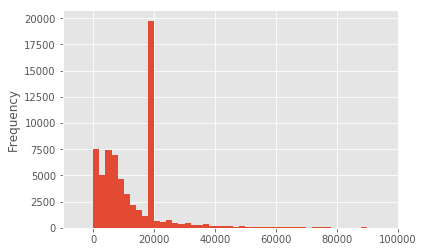

In [74]:
df['salario'].plot.hist(bins=500, xlim=(-10000, 100000))

Para continuar tratando dos dados da variável salário, precisamos eliminar os valores extremos (outliers), que estão enviesando a amostra. Vamos utilizar uma máscara para tentar preservar a aleatoriedade.

In [75]:
mascara_valores_extremos = (df['salario']>=0) & (df['salario']< 999999)

In [76]:
pd.DataFrame(mascara_valores_extremos)

,salario
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [77]:
# Calculando a porcentagem dos dados que foi preservada

(mascara_valores_extremos.sum()/df.shape[0])*100

97.79148488039718

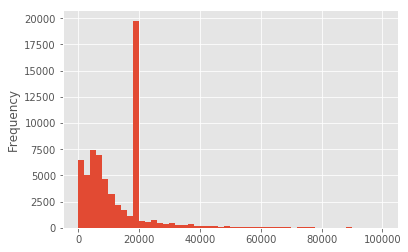

In [78]:
df['salario'][mascara_valores_extremos].plot.hist(bins=50, range=(0,100000))

### Sobrescrevendo os dados da variável salário


In [79]:
df['salario'][mascara_valores_extremos].value_counts().nlargest(7)

19706.790323    18592
0.000000         1841
5229.000000       277
7200.000000       260
7560.000000       244
6000.000000       231
9600.000000       221
Name: salario, dtype: int64

In [80]:
df['salario'].value_counts().nlargest(7)

 19706.790323     18592
 0.000000          1841
-1.000000          1101
 999999.000000      367
 5229.000000        277
 7200.000000        260
 7560.000000        244
Name: salario, dtype: int64

In [81]:
df['salario'] = df['salario'][mascara_valores_extremos]

In [82]:
df['salario'].value_counts().head()

19706.790323    18592
0.000000         1841
5229.000000       277
7200.000000       260
7560.000000       244
Name: salario, dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
seq             66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         65002 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


In [84]:
df.shape

(66470, 9)

In [85]:
65002 - 66470 

-1468

In [86]:
65002 -1468

63534

In [87]:
df['salario'].isnull().sum()

1468

In [88]:
df['salario'].fillna(df['salario'].mean(),inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
seq             66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         66470 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


In [90]:
pd.DataFrame(mascara_valores_extremos)

,salario
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


## Explorando a variável 'idade'

A idade é uma variável quantitativa discreta que não apresenta valores faltantes (*missing values*). Vamos explorar os valores e a distribuição dos dados.

In [91]:
df.idade.value_counts(dropna=False).nlargest(7)

20    2104
28    2056
26    2040
22    2034
27    2017
23    2014
25    2014
Name: idade, dtype: int64

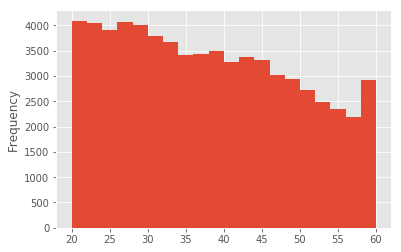

In [92]:
df.idade.plot.hist(bins=20)

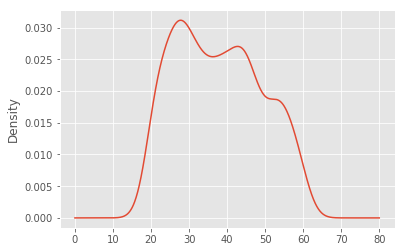

In [93]:
# Verificando o perfil da distribuição por um gráfico KDE (Kernel Density Estimate)

df['idade'].sample(1000).plot.kde()

## Explorando a variável 'anos_estudo'

Também trata-se de uma variável quantitativa discreta, com valores faltantes (*missing values*) ou NaNs estatísticamente insignificante (434 em 66470 -> 0.65%)

In [94]:
df.anos_estudo.value_counts(dropna=False)

5.0     23349
11.0    16790
15.0     5636
8.0      5017
10.0     2704
7.0      2612
12.0     2610
9.0      2474
6.0      2237
13.0     1348
14.0     1259
NaN       434
Name: anos_estudo, dtype: int64

In [95]:
df.anos_estudo.isnull().sum()

434

In [96]:
len(df.anos_estudo)

66470

In [97]:
perc_null = (df.anos_estudo.isnull().sum()/len(df.anos_estudo)) *100
perc_null

0.6529261320896645

In [98]:
df.anos_estudo.dropna(0,inplace=True)

df.anos_estudo.value_counts(dropna=True)

5.0     23349
11.0    16790
15.0     5636
8.0      5017
10.0     2704
7.0      2612
12.0     2610
9.0      2474
6.0      2237
13.0     1348
14.0     1259
Name: anos_estudo, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
seq             66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         66470 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


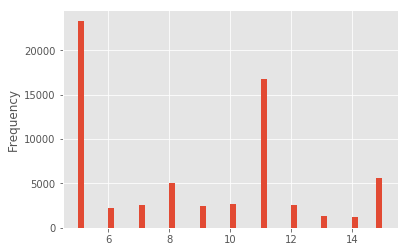

In [100]:
df.anos_estudo.plot.hist(bins=50)

## Explorando da variável região

A variável da região pode ser classificada como qualitativa nominal com 5 categorias. Observamos que a opção do **nosdeste** está muito reduzida, o que indica possivelmente a presença de um viés.

### Viés

*fonte: Wikipedia*

**Viés** ou tendência é um peso desproporcional a favor ou contra uma coisa, pessoa ou grupo comparado a outro, geralmente de uma maneira considerada injusta.

In [101]:
df.regiao.value_counts(dropna=False)

sudeste         25220
centro-oeste    14702
norte           14653
sul             11890
nordeste            5
Name: regiao, dtype: int64

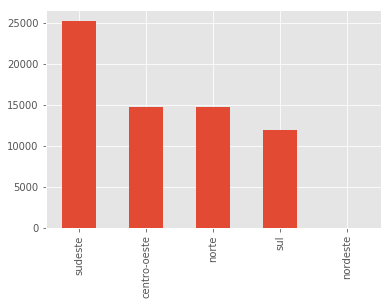

In [102]:
df.regiao.value_counts().plot(kind='bar')

## Explorando a variável cor/raca

Também trata-se de uma variável qualitativa nominal com 5 categorias, com número de valores faltantes ou *missing values* insignificante. Como boas práticas, vamos eliminar o caracter de barra ( / ) do título para evitar erros de processamento computacional.

In [103]:
df.rename(columns={'cor/raca':'cor_raca'},inplace=True)

In [104]:
df.columns

Index(['seq', 'id', 'idade', 'sexo', 'anos_estudo', 'cor_raca', 'salario',
       'estado_civil', 'regiao'],
      dtype='object')

In [105]:
df.cor_raca.value_counts(dropna=False)

Branca      31689
Parda       28370
Preta        5249
Indigena      597
Amarela       323
NaN           242
Name: cor_raca, dtype: int64

In [106]:
df.cor_raca.dropna(0,inplace=True)

df.cor_raca.value_counts(dropna=False)

Branca      31689
Parda       28370
Preta        5249
Indigena      597
Amarela       323
Name: cor_raca, dtype: int64

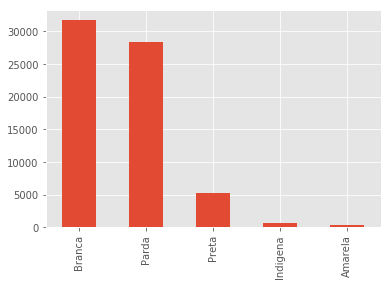

In [107]:
df.cor_raca.value_counts().plot(kind='bar')

In [108]:
# somente demonstração do .groupby

df.groupby(['cor_raca'])['salario'].mean()

cor_raca
Amarela     21812.578448
Branca      16430.640964
Indigena    12010.787049
Parda       12717.899303
Preta       12421.852015
Name: salario, dtype: float64

In [109]:
df.groupby(['regiao'])['salario'].mean()

regiao
centro-oeste    15494.765622
nordeste        27651.196207
norte           12886.816661
sudeste         14850.539116
sul             14541.887739
Name: salario, dtype: float64

## Explorando a variável 'estado_civil'

Trata-se de uma variável binária (duas categorias), sem *missing values*. O fato mais curioso é que não está explicito qual a representação dos valores encontrados, ou seja, quais opções correspondem aos números 0.0 e 1.0. Geralmente os bancos de dados tem um dicionário ou memorial descritivo com informações complementares, como por exemplo quais valores equivalem a solteiros e casados, ou alguma outra opção.

In [110]:
df['estado_civil'].value_counts(dropna=False)

1.0    39066
0.0    27404
Name: estado_civil, dtype: int64

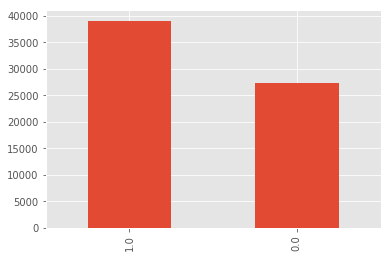

In [111]:
df.estado_civil.value_counts().plot(kind='bar')

## Explorando a variável 'sexo'

Também trata-se de uma variável binária (duas categorias), e sem *mising values*. Além disso, também apresenta um fato curioso de 72 observações dentro de uma terceira categoria denominada 'gestante'. Trataremos destes valores com a substituição por 'mulher'.

In [112]:
df['sexo'].value_counts(dropna=False)

mulher      33607
homem       32791
gestante       72
Name: sexo, dtype: int64

In [113]:
df = df.replace('gestante', 'mulher')

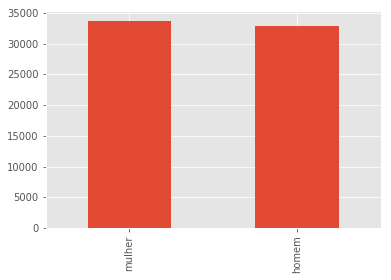

In [114]:
df.sexo.value_counts().plot(kind='bar')

# Desafio: os homens ganham mais do que as mulheres?



O objetivo deste desafio é trabalhar com os conceitos de **Medidas de Centralidade** (média, moda, mediana), e a partir dos resultados, fazer uma análise do comportamento da variável salário.

Como na nossa modelagem fizemos muitas alterações nos dados, vamos começar do zero lendo novamente o arquivo original

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
seq             66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor_raca        66228 non-null object
salario         66470 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


In [116]:
df['sexo'].value_counts(dropna=False)

mulher    33679
homem     32791
Name: sexo, dtype: int64

In [117]:
df = df.replace('gestante', 'mulher')

In [118]:
df['sexo'].value_counts(dropna=False)

mulher    33679
homem     32791
Name: sexo, dtype: int64

## Separando os dados em dois DataFrames distintos (homem e mulher)

In [119]:
df_homem = df[df['sexo'] == 'homem']
df_mulher = df[df['sexo'] == 'mulher']

## Testando as hipóteses de salário maior para os homens para média, mediana e moda

In [120]:
df_homem['salario'].mean()

15423.061802717515

In [121]:
media_salario_homem = df_homem['salario'].mean()
mediana_salario_homem = df_homem['salario'].median()
moda_salario_homem = df_homem['salario'].idxmax()

media_salario_mulher = df_mulher['salario'].mean()
mediana_salario_mulher = df_mulher['salario'].median()
moda_salario_mulher = df_mulher['salario'].idxmax()

In [122]:
media_salario_homem > media_salario_mulher

True

In [123]:
mediana_salario_homem > mediana_salario_mulher

False

In [124]:
moda_salario_homem > moda_salario_mulher

False

In [125]:
print('Salário médio homens =',"%.2f"% media_salario_homem,'Salário médio mulheres =',"%.2f"% media_salario_mulher)
print('Salário mediano homens =',"%.2f"% mediana_salario_homem,'Salário mediano mulheres =',"%.2f"% mediana_salario_mulher)
print('Salário mais frequente homens =',"%.2f"% moda_salario_homem,'Salário mais frequente mulheres =',"%.2f"% moda_salario_mulher)

Salário médio homens = 15423.06 Salário médio mulheres = 13612.90
Salário mediano homens = 10494.00 Salário mediano mulheres = 14505.89
Salário mais frequente homens = 48679.00 Salário mais frequente mulheres = 56470.00


## Plotando um histograma

In [126]:
df_homem.dropna(inplace=True)
df_mulher.dropna(inplace=True)
import warnings
warnings.filterwarnings("ignore")

C:\Users\BeMore\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\BeMore\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


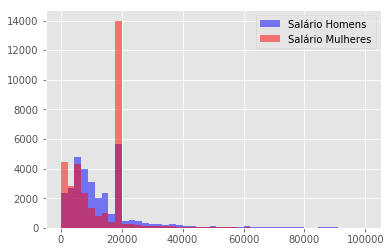

In [127]:
from matplotlib import pyplot

bins = 45

ax = pyplot.hist(df_homem['salario'], bins, alpha=0.5, label='Salário Homens',color='blue', range=(0,100000))
ax = pyplot.hist(df_mulher['salario'], bins, alpha=0.5, label='Salário Mulheres',color='red', range=(0,100000))

pyplot.legend(loc='upper right')
pyplot.show()

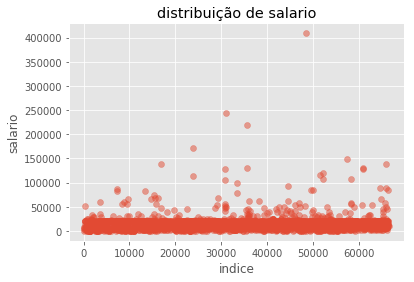

In [128]:
import matplotlib.pyplot as plt
 
sample = df.sample(2000)
# Plot
plt.scatter(y=sample.salario,x=sample.salario.index, alpha=0.5)
plt.title('distribuição de salario')
plt.xlabel('indice')
plt.ylabel('salario')
plt.show()

In [129]:
df['salario'] = df['salario'][(df['salario']>0) & (df['salario']< 999999)]

In [130]:
df['salario'].value_counts().head()

19706.790323    18592
14505.889370     1468
5229.000000       277
7200.000000       260
7560.000000       244
Name: salario, dtype: int64

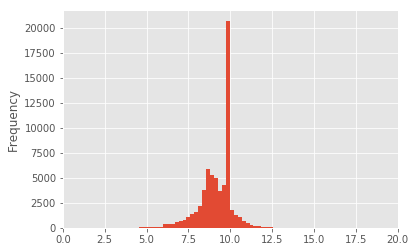

In [131]:
df['log_salario'] = np.log1p(df['salario'])
df['log_salario'].plot.hist(bins=50, xlim=(0, 20))

In [132]:
df['log_salario'].value_counts(dropna=False).head()

9.888769    18592
NaN          1841
9.582379     1468
8.562167      277
8.881975      260
Name: log_salario, dtype: int64

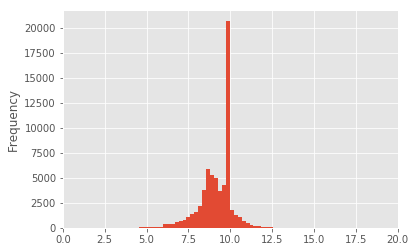

In [133]:
df['log_salario'] = np.log1p(df['salario'])
df['log_salario'].plot.hist(bins=50, xlim=(0, 20))

## Direcionamento da problemática inicial através dos resultados das análises

In [134]:
import numpy as np
import pandas as pd

import plotly.plotly as py
import plotly.tools as tls

ModuleNotFoundError: No module named '_plotly_future_'

In [ ]:
tls.set_credentials_file(username='bigdata1', api_key='hvginfgvwe')

In [ ]:
regions = pd.read_csv(r'../../99 Datasets/demografia_1.csv')
regions.columns = ['seq', 'id', 'idade', 'sexo', 'anos_estudo', 'cor/raca' , 'salario', 'estado_civil', 'regiao']
regions.head()

In [ ]:
# importando a biblioteca folium para análise no mapa
import folium
from IPython.display import display
LDN_COORDINATES = (-23, -46)
myMap = folium.Map(location=LDN_COORDINATES, zoom_start=4)
display(myMap)

In [ ]:
# importando a biblioteca folium para análise no mapa
import folium
from IPython.display import display
LDN_COORDINATES = (-23, -46)
myMap = folium.Map(location=LDN_COORDINATES, zoom_start=4)
display(myMap)

<br>
<img src="img/sudeste.png">
<br>

In [ ]:
df['regiao'].value_counts()

## Direcionamento da problemática inicial através dos resultados das análises

Através dos dados apresentados, a melhor estratégia é focar os esforços inicialmente na região sudeste em virtude do perfil feminino de compra, salário médio e densidade demográfica.

A partir da captação de um volume expressivo de vendas, faremos uma nova análise para identificar oportunidades em outras regiões.



